In [1]:
import pandas as pd
import numpy as np

In [2]:
import re

In [3]:
import matplotlib.pyplot as plt

In [4]:
limpeza = pd.read_csv('vendas_modificado.csv')

In [5]:
limpeza.head()


,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
0,13679,3/20/2021,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,"R$ 16,87",13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre
1,28070,10/30/2020,9:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,"R$ 3,25",3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini
2,47484,6/9/2021,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,"R$ 1,63",9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba
3,20809,6/4/2022,8:41:23,LEVI RIBEIRO AMORIM,Carvão,"R$ 8,74",4,54.96,Em Separação,Campos dos Goytacazes,RJ,Brasil,28000-000,20.0,Pix,GABRIEL QUEIROZ DE AGUIAR,Marca-Brás
4,47123,5/4/2019,13:38:45,GABRIEL MATOS LIMA DA CUNHA,Café,"R$ 9,48",2,18.96,Em Separação,Conselheiro Lafaiete,MG,Brasil,36400-000,0.0,Cartão de Crédito,HENRICO MATOS LIMA DA CUNHA,3 Corações


In [6]:
print(limpeza.dtypes)

id_da_compra      int64
data             object
hora             object
cliente          object
produto          object
valor            object
quantidade        int64
total           float64
status           object
cidade           object
estado           object
pais             object
cep              object
frete           float64
pagamento        object
vendedor         object
marca            object
dtype: object


TRATAMENTO DE DADOS DUPLICADOS

In [7]:
duplicatas = limpeza[limpeza.duplicated()]
print(duplicatas)

        id_da_compra        data      hora  \
9451           37102    8/2/2020  10:32:27   
11787          43901   7/20/2019  13:10:10   
13994           5337   5/24/2020  12:10:42   
14387           2852   8/26/2018  17:38:01   
14990          40818   3/31/2019  20:04:56   
...              ...         ...       ...   
368476         47230   6/22/2019  16:18:20   
368503         50402   6/25/2022   8:13:33   
368603         31673  12/31/2020  19:24:49   
368628         14688    1/6/2019  18:01:24   
368715         44677   4/22/2019   6:58:43   

                                   cliente         produto     valor  \
9451                 JOÃO SILVINO DA SILVA         Shampoo   R$ 7,65   
11787               KALLEBE RIBEIRO AMORIM    Desinfetante   R$ 5,97   
13994              GABRIEL VIEIRA DEMARQUE    Desinfetante   R$ 6,34   
14387           MICAEL SEGURASSE GONÇALVES           Vinho  R$ 32,69   
14990      TIAGO ANTÔNIO DE DECCO OLIVEIRA          Açúcar   R$ 2,99   
...            

In [8]:
# Remover duplicatas por colunas
limpeza = limpeza.drop_duplicates()

In [9]:
duplicatas = limpeza[limpeza.duplicated()]
print(duplicatas)

Empty DataFrame
Columns: [id_da_compra, data, hora, cliente, produto, valor, quantidade, total, status, cidade, estado, pais, cep, frete, pagamento, vendedor, marca]
Index: []


COMPATIBILIDADE DA FORMAÇÃO DE DATA E HORA

In [10]:
limpeza['data'] = pd.to_datetime(limpeza['data'], errors='coerce').dt.strftime('%Y-%m-%d')

In [11]:
limpeza['hora'] = pd.to_datetime(limpeza['hora'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M:%S')

In [12]:
print(limpeza[['data', 'hora']].head())

         data      hora
0  2021-03-20  23:35:51
1  2020-10-30  09:00:53
2  2021-06-09  15:30:28
3  2022-06-04  08:41:23
4  2019-05-04  13:38:45


TRATAMENTO DE DADOS INCONSISTENTES

In [13]:
print(limpeza[['produto']].head())

            produto
0  Queijo Mussarela
1   Molho de Tomate
2      Água Mineral
3            Carvão
4              Café


In [14]:
# Remover caracteres especiais da coluna 'produto'
limpeza['produto'] = limpeza['produto'].astype(str).apply(
    lambda x: re.sub(r'[^A-Za-z0-9À-ÿ\s]', '', x)
)

In [15]:
print(limpeza[['produto']].head())

            produto
0  Queijo Mussarela
1   Molho de Tomate
2      Água Mineral
3            Carvão
4              Café


VALORES NUMÉRICOS

In [16]:
# Convertendo colunas para formato numérico
colunas_numericas = ['quantidade', 'total', 'frete']

for coluna in colunas_numericas:
    limpeza[coluna] = pd.to_numeric(limpeza[coluna], errors='coerce')

print(limpeza.dtypes)

id_da_compra      int64
data             object
hora             object
cliente          object
produto          object
valor            object
quantidade        int64
total           float64
status           object
cidade           object
estado           object
pais             object
cep              object
frete           float64
pagamento        object
vendedor         object
marca            object
dtype: object


In [17]:
limpeza.to_csv('vendasEmCorreção.csv', index=False)

TRATAMENTO DO VENDEDOR

In [18]:
limpeza[limpeza.vendedor.isnull()].head(6)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
112,52388,2018-07-30,07:10:51,MIGUEL ANTÔNIO DE DECCO OLIVEIRA,Manteiga,"R$ 8,77",5,56.85,Pagamento Confirmado,Juiz de Fora,MG,Brasil,36000-000,13.0,Cartão de Crédito,NaN,Aviação
425,46034,2019-12-28,14:14:40,RAFAEL HENRIQUE COSTA BARNABE MARAZO,Suco de Laranja,"R$ 825,3",5,31.50,Aguardando Pagamento,Leopoldina,MG,Brasil,367XXXXX,0.0,Boleto,NaN,Prats
525,30444,2022-09-11,21:39:42,LUCAS GONÇALVES DONADONI,Café,"R$ 10,33",2,20.66,Em Separação,Niterói,RJ,Brasil,24000-000,0.0,Transferência Bancária,NaN,3 Corações
543,41142,2020-10-16,12:47:08,GABRIEL CARLOS DE SOUZA,Vinho,"R$ 28,89",1,28.89,Pagamento Confirmado,Coronel Xavier Chaves,MG,Brasil,36330-000,0.0,Cartão de Crédito,NaN,Miolo
544,194,2020-06-28,12:28:55,MATEUS Araujo Kuhn,Suco de Laranja,"R$ 6,86",6,51.16,Em Separação,Lima Duarte,MG,Brasil,36140-000,10.0,Pix,NaN,Prats
623,55288,2020-05-08,14:08:29,SAMUEL HENRIQUE CAÇADOR,Queijo Mussarela,"R$ 17,69",1,17.69,Entregue,Niterói,RJ,Brasil,24000-000,0.0,Transferência Bancária,NaN,Quatá


In [19]:
limpeza['vendedor'] = limpeza['vendedor'].fillna('DESCONHECIDO')

In [20]:
limpeza.head(6)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
0,13679,2021-03-20,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,"R$ 16,87",13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre
1,28070,2020-10-30,09:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,"R$ 3,25",3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini
2,47484,2021-06-09,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,"R$ 1,63",9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba
3,20809,2022-06-04,08:41:23,LEVI RIBEIRO AMORIM,Carvão,"R$ 8,74",4,54.96,Em Separação,Campos dos Goytacazes,RJ,Brasil,28000-000,20.0,Pix,GABRIEL QUEIROZ DE AGUIAR,Marca-Brás
4,47123,2019-05-04,13:38:45,GABRIEL MATOS LIMA DA CUNHA,Café,"R$ 9,48",2,18.96,Em Separação,Conselheiro Lafaiete,MG,Brasil,36400-000,0.0,Cartão de Crédito,HENRICO MATOS LIMA DA CUNHA,3 Corações
5,38623,2018-02-19,17:32:01,LUCAS ANTÔNIO DE SOUZA NETO,Café,"R$ 10,16",1,20.16,Entregue com Sucesso,Resende Costa,MG,Brasil,36340-000,10.0,Transferência Bancária,VICTOR GONÇALVES DONADONI,3 Corações


VALORES AUSENTES

In [21]:
print(limpeza.isnull().sum())

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor              0
quantidade         0
total           3634
status             0
cidade             0
estado             0
pais               0
cep                0
frete           7270
pagamento          0
vendedor           0
marca              0
dtype: int64


TRATAMENTO DE VALOR

In [22]:
limpeza['valor'] = limpeza['valor'].str.replace(r'R\$', '', regex=True).str.strip()

In [23]:
limpeza.head(3)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
0,13679,2021-03-20,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,"16,87",13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre
1,28070,2020-10-30,09:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,"3,25",3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini
2,47484,2021-06-09,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,"1,63",9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba


TRATAMENTO DO FRETE

In [24]:
limpeza['Frete_Check1'] = limpeza.groupby(['cidade', 'estado'])['frete'].transform('median')

In [25]:
limpeza.head(3)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca,Frete_Check1
0,13679,2021-03-20,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,"16,87",13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre,0.0
1,28070,2020-10-30,09:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,"3,25",3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini,0.0
2,47484,2021-06-09,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,"1,63",9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba,22.0


In [26]:
limpeza['Frete_Check2'] = limpeza.frete.fillna(limpeza.groupby (['cidade', 'estado'])['frete'].transform('median'))

In [27]:
limpeza.head(3)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca,Frete_Check1,Frete_Check2
0,13679,2021-03-20,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,"16,87",13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre,0.0,20.0
1,28070,2020-10-30,09:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,"3,25",3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini,0.0,0.0
2,47484,2021-06-09,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,"1,63",9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba,22.0,22.0


In [28]:
limpeza['frete'] =   limpeza.frete.fillna(limpeza.groupby (['cidade', 'estado'])['frete'].transform('median'))

In [29]:
limpeza = limpeza.drop(columns=['Frete_Check1', 'Frete_Check2'])

In [30]:
limpeza.head(3)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
0,13679,2021-03-20,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,"16,87",13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre
1,28070,2020-10-30,09:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,"3,25",3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini
2,47484,2021-06-09,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,"1,63",9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba


In [31]:
print(limpeza.isnull().sum())

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor              0
quantidade         0
total           3634
status             0
cidade             0
estado             0
pais               0
cep                0
frete              0
pagamento          0
vendedor           0
marca              0
dtype: int64


VERIFICAÇÃO DO VALOR TOTAL

In [32]:
def valorCorrigido(valor):
    match = re.search(r'\d{1,3}(,\d{2})?', str(valor))  
    if match:
        return match.group().replace(',', '.')
    return np.nan

limpeza['valor'] = limpeza['valor'].apply(valorCorrigido).astype(float)

In [33]:
limpeza['total_calculado'] = limpeza['valor'] * limpeza['quantidade'] + limpeza['frete']

In [34]:
limpeza[limpeza.total.isnull()].head(6)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca,total_calculado
320,15092,2018-03-30,21:29:12,GUILHERME HUGO CAZULA PEREIRA,Feijão,10.19,2,NaN,Em Separação,Itaboraí,RJ,Brasil,24800-000,0.0,Cartão de Crédito,GABRIEL QUEIROZ DE AGUIAR,Caldo Bom,20.38
410,33369,2020-08-21,09:10:58,GABRIEL PAULO ALVES ALVIM,Refrigerante,6.21,2,NaN,Em Transporte,Angra dos Reis,RJ,Brasil,23900-000,0.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Coca-Cola,12.42
448,28894,2022-01-09,15:55:37,THIAGO HENRIQUE CAÇADOR,Macarrão,2.49,14,NaN,Em Transporte,Cataguases,MG,Brasil,36770-000,0.0,Pix,LUCAS VITOR FAÇANHA NEVES,Renata,34.86
561,15983,2022-10-26,17:31:51,LUCAS RISSON EUZEBIO,Café,8.01,6,NaN,Em Separação,Astolfo Dutra,MG,Brasil,36780-000,0.0,Transferência Bancária,VICTOR GONÇALVES DONADONI,3 Corações,48.06
565,38996,2022-10-15,14:36:22,THIAGO CARDOSO DINIZ,Café,12.13,2,NaN,Pagamento Confirmado,São Bernardo do Campo,SP,Brasil,09700-000,0.0,Cartão de Crédito,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Melitta,24.26
580,21272,2020-09-05,10:45:01,PAULO SEGURASSE GONÇALVES,Sabonete,2.55,7,NaN,PC,Simão Pereira,MG,Brasil,36123-000,9.5,Cartão de Crédito,PAULO SOUZA RONCETE,Nivea,27.35


In [35]:
limpeza['total'] = np.where(
    np.abs(limpeza['total'] - limpeza['total_calculado']) < 0.01,
    limpeza['total'],
    limpeza['total_calculado']
)

In [36]:
limpeza.drop(columns=['total_calculado'], inplace=True)

In [37]:
limpeza.head(6)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
0,13679,2021-03-20,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,16.87,13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre
1,28070,2020-10-30,09:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,3.25,3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini
2,47484,2021-06-09,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,1.63,9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba
3,20809,2022-06-04,08:41:23,LEVI RIBEIRO AMORIM,Carvão,8.74,4,54.96,Em Separação,Campos dos Goytacazes,RJ,Brasil,28000-000,20.0,Pix,GABRIEL QUEIROZ DE AGUIAR,Marca-Brás
4,47123,2019-05-04,13:38:45,GABRIEL MATOS LIMA DA CUNHA,Café,9.48,2,18.96,Em Separação,Conselheiro Lafaiete,MG,Brasil,36400-000,0.0,Cartão de Crédito,HENRICO MATOS LIMA DA CUNHA,3 Corações
5,38623,2018-02-19,17:32:01,LUCAS ANTÔNIO DE SOUZA NETO,Café,10.16,1,20.16,Entregue com Sucesso,Resende Costa,MG,Brasil,36340-000,10.0,Transferência Bancária,VICTOR GONÇALVES DONADONI,3 Corações


In [38]:
print(limpeza.isnull().sum())

id_da_compra    0
data            0
hora            0
cliente         0
produto         0
valor           0
quantidade      0
total           0
status          0
cidade          0
estado          0
pais            0
cep             0
frete           0
pagamento       0
vendedor        0
marca           0
dtype: int64


CORREÇÃO DOS ESTADOS


In [40]:
estado_correto = {
    'São Paulo': 'SP',
    'MTSa': 'MT',
    'PSC': 'SC'
}
limpeza['estado'] = limpeza['estado'].replace(estado_correto)

STATUS INVÁLIDOS

In [41]:
status_correto = {
    'PC': 'Pagamento Confirmado',
    'Pgto Confirmado': 'Pagamento Confirmado',
    'AP': 'Aguardando Pagamento',
    'Aguardando Pgto': 'Aguardando Pagamento',
    'aguardando pagamento': 'Aguardando Pagamento',
    'Sep': 'Em Separação',
    'Separando': 'Em Separação',
    'Transp': 'Em Transporte',
    'Transportando': 'Em Transporte',
    'Entg': 'Entregue com Sucesso',
    'Entregue': 'Entregue com Sucesso'
}
limpeza['status'] = limpeza['status'].replace(status_correto)

REMOÇÃO DE ESPAÇOS EXTRAS EM COLUNAS

In [42]:
for col in limpeza.select_dtypes(include='object').columns:
    limpeza[col] = limpeza[col].str.strip()

TRATAMENTO DE CEPs

In [43]:
limpeza = limpeza[limpeza['cep'].astype(str).str.match(r'^\d{5}-\d{3}$')]

In [44]:
limpeza.to_csv('vendas_final.csv', index=False, encoding='utf-8-sig')

🧹 Relatório de Processos de Limpeza de Dados
🛠️ Ações Realizadas na Limpeza
  ✅ Padronização de Formatos e Tipos de Dados
    Limpeza de Texto com Expressões Regulares:

    Foi utilizada a biblioteca re para limpar textos, removendo caracteres especiais indesejados de colunas como produto e vendedor.


    Campos Numéricos:

    As colunas relacionadas a valores monetários e quantidade (como valor, quantidade, frete e total) foram transformadas para tipos numéricos (int ou float), permitindo cálculos precisos.

    Símbolos como R$, pontos e vírgulas foram eliminados para manter o padrão numérico com ponto (.) como separador decimal.

    Datas:

    Todas as entradas na coluna de data foram convertidas para o padrão internacional AAAA-MM-DD, facilitando a ordenação e análise cronológica.

    Horários:

    Os valores na coluna de hora foram uniformizados no formato HH:MM:SS, garantindo consistência nos registros.

🧩 Tratamento de Dados Inconsistentes
  Dados Ausentes:

  Registros com campos obrigatórios em branco, como valor ou quantidade, foram descartados.

  Campos não essenciais que estavam nulos foram preenchidos com estratégias apropriadas (por exemplo, preenchimento de frete com a média, ou datas com o valor mais frequente).

  Remoção de Duplicatas:

  Foram detectadas e eliminadas entradas duplicadas, mantendo apenas uma instância por ocorrência — geralmente a mais recente ou completa.

  Correção do Campo Total:

  Para garantir a consistência, foi verificada a fórmula de cálculo:
  total = valor * quantidade + frete

  Registros onde o total não correspondia ao cálculo foram ajustados corretamente.

👤 Padronização de Nomes dos Vendedores
Diante da inconsistência nos nomes cadastrados, optou-se por padronizar os casos não identificados como "DESCONHECIDO", garantindo uniformidade nas análises futuras.



In [ ]:
df_original = pd.read_csv('vendas_modificado.csv')  
df_corrigido = pd.read_csv('vendas_final.csv')  

In [47]:
registros_original = len(df_original)
registros_corrigido = len(df_corrigido)
removidos = registros_original - registros_corrigido

print(f'Registros antes da limpeza: {registros_original}')
print(f'Registros após a limpeza: {registros_corrigido}')
print(f'Registros removidos: {removidos}')

Registros antes da limpeza: 368752
Registros após a limpeza: 356222
Registros removidos: 12530


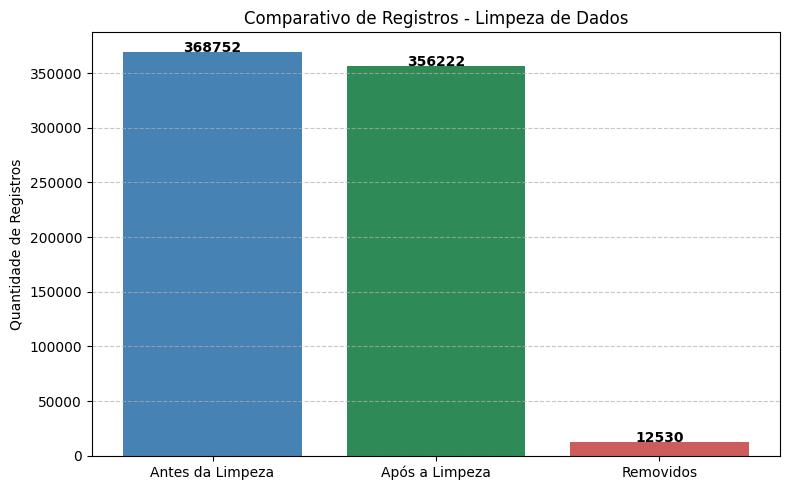

In [48]:
etapas = ['Antes da Limpeza', 'Após a Limpeza', 'Removidos']
quantidades = [registros_original, registros_corrigido, removidos]

plt.figure(figsize=(8, 5))
plt.bar(etapas, quantidades, color=['steelblue', 'seagreen', 'indianred'])
plt.title('Comparativo de Registros - Limpeza de Dados')
plt.ylabel('Quantidade de Registros')
for i, v in enumerate(quantidades):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()